In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.18.0


In [ ]:
# import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Divide the dataset into independent and dependent features

X = dataset.iloc[:,3:13];
y = dataset.iloc[:,13];

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [ ]:
# Feature Engineering
pd.get_dummies(X['Geography'])

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True
...,...,...,...
9995,True,False,False
9996,True,False,False
9997,True,False,False
9998,False,True,False


In [ ]:
pd.get_dummies(X['Geography'], drop_first=True)

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True
...,...,...
9995,False,False
9996,False,False
9997,False,False
9998,True,False


In [ ]:
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [ ]:
# delete original columns and concatenate above two columns with dataframe
X.drop(['Geography', 'Gender'], axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [ ]:
X = X.drop(['Geography', 'Gender'], axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
X = pd.concat([X, geography, gender], axis=1)

In [ ]:
# why we are doing all this?
# ans - to handle categorical features

In [ ]:
# Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
# feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
# part 2 - ANN creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
# Lets initialize the ANN
classifier = Sequential()

In [ ]:
# Adding the input layer
classifier.add(Dense(units=11, activation='relu'))

In [ ]:
# adding 1st hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.2))

In [ ]:
# adding 2nd hidden layer
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dropout(0.3))

In [ ]:
# adding the output layer
classifier.add(Dense(1, activation='sigmoid'))

In [ ]:
# by default adam uses learning rate = 0.1
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# defining early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7491 - loss: 0.5504 - val_accuracy: 0.7970 - val_loss: 0.4546
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8099 - loss: 0.4463 - val_accuracy: 0.8186 - val_loss: 0.4062
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8402 - loss: 0.3890 - val_accuracy: 0.8319 - val_loss: 0.3821
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8508 - loss: 0.3834 - val_accuracy: 0.8497 - val_loss: 0.3723
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8377 - loss: 0.3945 - val_accuracy: 0.8508 - val_loss: 0.3651
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8401 - loss: 0.3865 - val_accuracy: 0.8561 - val_loss: 0.3594
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8435 - loss: 0.3834 - val_accuracy: 0.8425 - val_loss: 0.3735
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8405 - loss: 0.3669 - 

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

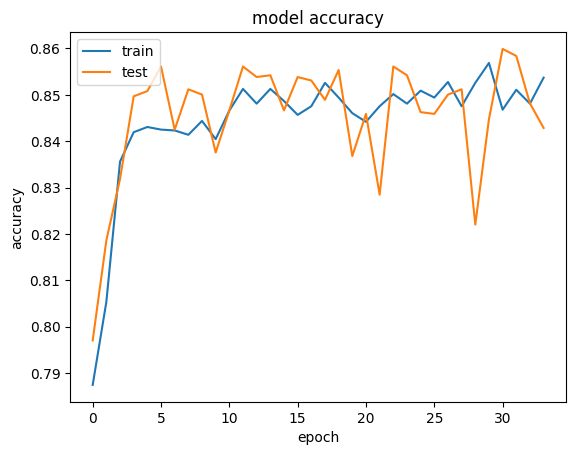

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

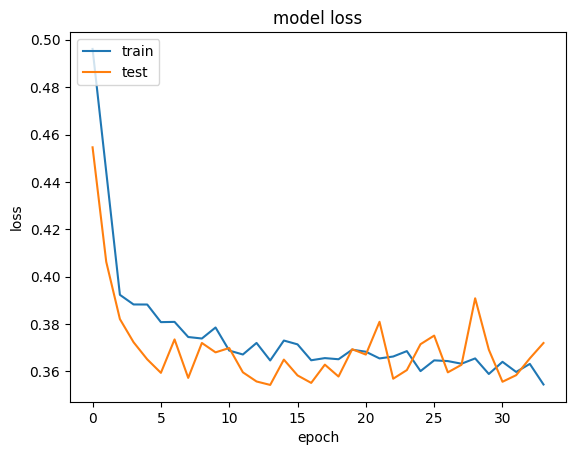

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# part 3 - making the predictions and evaluating the model

# predicting the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
# make confusion metrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1579,   16],
       [ 285,  120]])

In [ ]:
# calculating accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.8495

In [ ]:
classifier.get_weights()

[array([[ 0.30974627, -0.6986125 , -0.06061238,  0.84960973, -0.20846991,
         -0.132474  ,  0.11451381, -0.02199665, -0.19179603, -0.26138794,
         -0.03748753],
        [ 1.5192354 , -1.3026876 , -1.975597  , -0.6155428 ,  2.8458943 ,
          2.530632  , -0.26865238,  0.23755972,  0.36093158,  1.0430595 ,
         -3.1286783 ],
        [-0.5472204 , -0.64975315,  1.0812023 , -0.31088   ,  0.08631997,
          0.10597502,  0.71367836, -0.00931987,  0.02359824,  0.07431579,
         -1.0614179 ],
        [ 1.1624053 , -1.3788869 , -1.7309821 , -1.3752855 ,  0.63677466,
          0.01864418,  2.1106794 , -2.709136  ,  0.86870706, -0.23614836,
          0.08639386],
        [ 1.1235452 ,  0.18073055, -0.51224285,  0.5422109 , -1.4277676 ,
         -0.4577496 , -0.2036037 , -3.2170093 ,  2.856395  , -0.24429633,
         -0.2334868 ],
        [-0.2779586 , -0.17960538, -1.0407145 ,  0.77649635, -0.77551246,
         -0.18282749, -0.8827172 , -0.17398418, -0.03855994,  0.0163316